In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv("email.csv")
print(df.info())
print(df.iloc[0:5])
print(df.describe())
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
       Category                 Message
count      5573                    5573
unique        3                    5158
top         ham  Sorry, I'll call later
freq       4825                      30

Category    0
Message     0
dtype: int64


In [2]:
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [3]:
df.shape

(5158, 2)

In [4]:
distinct_values=df['Category'].unique()
print(distinct_values)

['ham' 'spam' '{"mode":"full"']


In [5]:
distinct_counts= df.groupby('Category')['Message'].nunique()
print(distinct_counts)

Category
ham               4516
spam               641
{"mode":"full"       1
Name: Message, dtype: int64


In [6]:
import matplotlib.pyplot as plt

['ham', 'spam', '{"mode":"full"']
[4516, 641, 1]


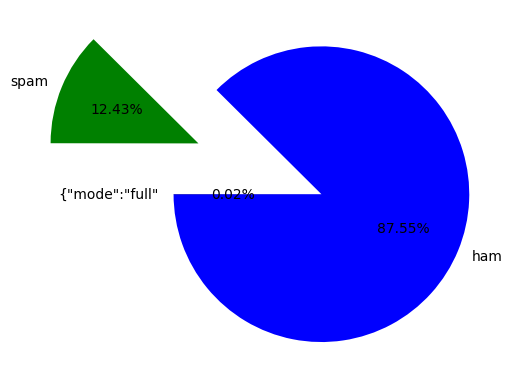

In [7]:
category_counts= distinct_counts.index.tolist()
message_counts= distinct_counts.values.tolist()
print(category_counts)
print(message_counts)
colors=["blue","green","black"]
explode=(0,0.9,0)
plt.pie(message_counts,labels=category_counts,colors=colors,autopct="%1.2f%%",explode=explode,startangle=180)
plt.show()





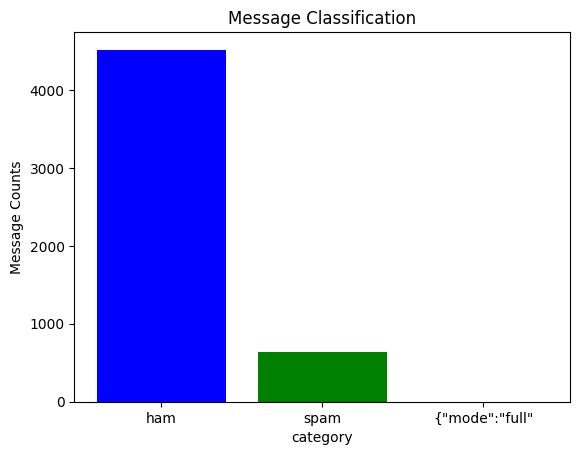

In [8]:
plt.xlabel("category")
plt.ylabel("Message Counts")
plt.title("Message Classification")
colors=["blue","green","yellow"]
plt.bar(category_counts,message_counts,color=colors)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
x=df['Message']
y=df['Category']
print(x)
print(y)

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=4)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572                                      isActive:false}
Name: Message, Length: 5158, dtype: object
0                  ham
1                  ham
2                 spam
3                  ham
4                  ham
             ...      
5568               ham
5569               ham
5570               ham
5571               ham
5572    {"mode":"full"
Name: Category, Length: 5158, dtype: object


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv= TfidfVectorizer(max_features= 1500)
x_train_cv= cv.fit_transform(x_train)
x_train_cv.shape
x_test_cv= cv.transform(x_test)

In [11]:
from sklearn import tree
clf= tree.DecisionTreeClassifier(max_depth=3)
clf=clf.fit(x_train_cv,y_train)


['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


[Text(0.5, 0.875, 'x[231] <= 0.101\ngini = 0.212\nsamples = 4126\nvalue = [3630, 495, 1]'),
 Text(0.25, 0.625, 'x[1330] <= 0.063\ngini = 0.136\nsamples = 3780\nvalue = [3503, 276, 1]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1471] <= 0.079\ngini = 0.1\nsamples = 3688\nvalue = [3493, 194, 1]'),
 Text(0.0625, 0.125, 'gini = 0.084\nsamples = 3654\nvalue = [3493, 160, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.375, 0.375, 'x[801] <= 0.14\ngini = 0.194\nsamples = 92\nvalue = [10, 82, 0]'),
 Text(0.3125, 0.125, 'gini = 0.128\nsamples = 87\nvalue = [6, 81, 0]'),
 Text(0.4375, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(0.75, 0.625, 'x[231] <= 0.181\ngini = 0.465\nsamples = 346\nvalue = [127, 219, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[801] <= 0.057\ngini = 0.268\nsamples = 220\nvalue = [35, 185, 0]'),
 Text(0.5625, 0.125, 'gini = 0.156\nsamples = 199\nvalue = [17, 182, 0]'),
 Text(0.6875, 0.125, 'gini

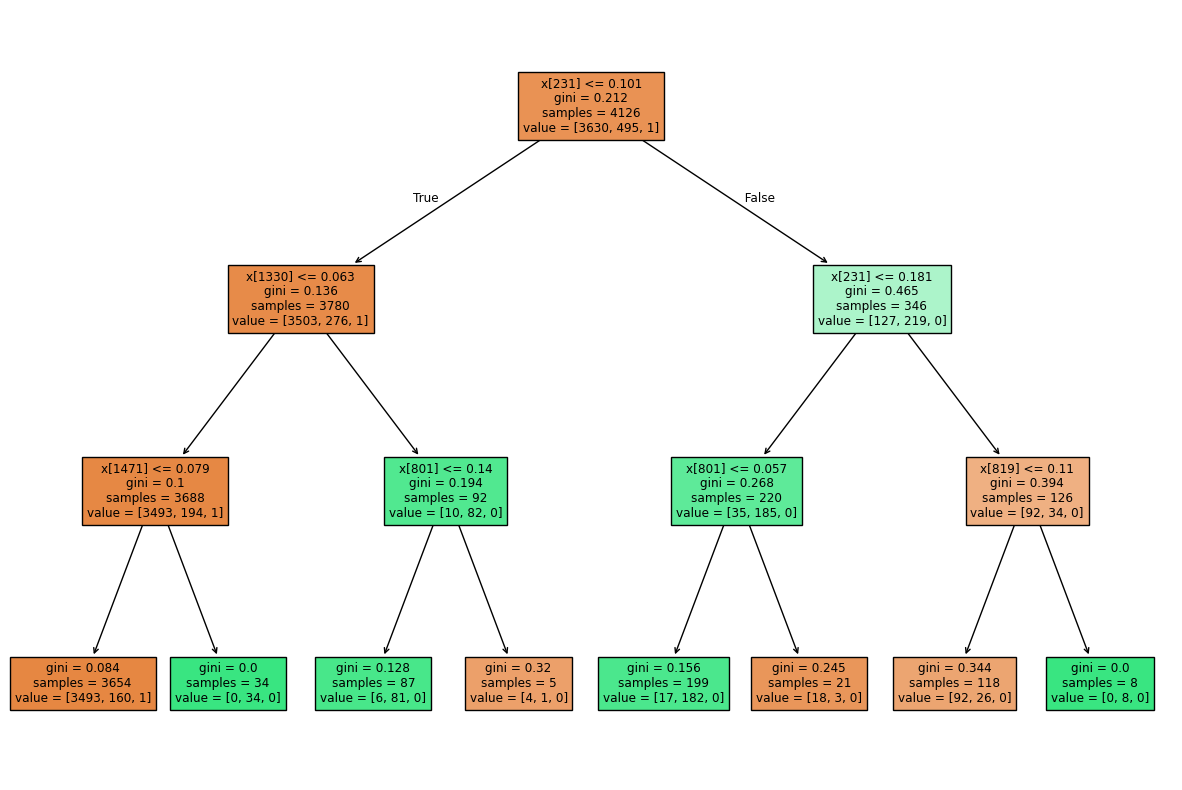

In [12]:
y_predict= clf.predict(x_test_cv)
print(y_predict)

plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [13]:
from sklearn.metrics import classification_report

print(y_predict)
print(classification_report(y_test,y_predict))

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       886
        spam       0.90      0.58      0.71       146

    accuracy                           0.93      1032
   macro avg       0.92      0.79      0.83      1032
weighted avg       0.93      0.93      0.93      1032



In [14]:
df=pd.read_csv("iris.csv")
a=df[["sepal_length","sepal_width","petal_length","petal_width"]]
b=df["species"]
print(a)
print(b)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [27]:
x1_train,x1_test,y1_train,y1_test= train_test_split(a,b, test_size=0.2,random_state=4)

In [38]:

clf= tree.DecisionTreeClassifier(max_depth=3)
clf=clf.fit(x1_train,y1_train)
x1_test=[[5.1,3.5,1.4,0.2]]
y_predict= clf.predict(x1_test)
print(y_predict)

#plt.figure(figsize=(15,10))
#tree.plot_tree(clf,filled=True)
#print(y_predict)
#print(classification_report(y1_test,y_predict))


['setosa']


C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['setosa' 'versicolor' 'virginica']


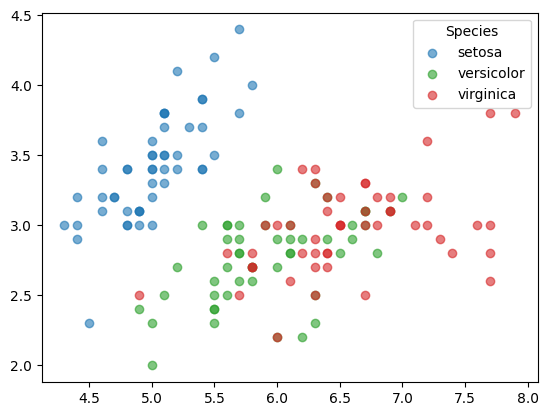

In [56]:
fig,ax= plt.subplots()
species=np.unique(df["species"])
print(species)
x=df["sepal_length"]
y=df["sepal_width"]
colors= ["tab:blue","tab:green","tab:red"]
for i, sp in enumerate(species):
    # Filter the data for the current species
    species_data = df[df["species"] == sp]
    x = species_data["sepal_length"]
    y = species_data["sepal_width"]
    ax.scatter(x, y, color=colors[i], label=sp,alpha=0.6)
ax.legend(title="Species")